In [4]:
import os 
os.getcwd()

'/drive'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('heart.attack.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Diet,Continent,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,Average,South America,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,Unhealthy,North America,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,Healthy,Europe,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,Average,North America,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,Unhealthy,Asia,0


In [8]:
data=df['Continent'].value_counts(normalize=True)*100
print(data)

Continent
Asia             29.882471
Europe           25.531383
South America    15.703926
Australia        10.302576
North America     9.552388
Africa            9.027257
Name: proportion, dtype: float64


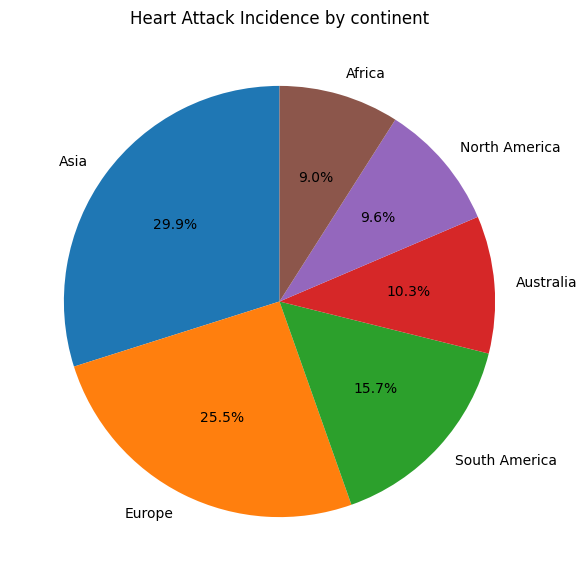

In [9]:
plt.figure(figsize=(7, 7))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
plt.title('Heart Attack Incidence by continent')
plt.show()

In [10]:
data2=df['Smoking'].value_counts(normalize=True)*100
print(data2)

Smoking
1    89.497374
0    10.502626
Name: proportion, dtype: float64


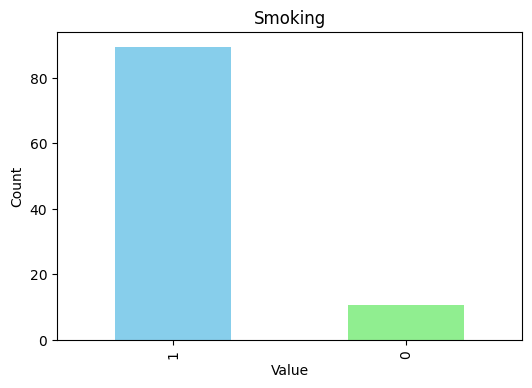

In [11]:
plt.figure(figsize=(6, 4))
data2.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Smoking')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [12]:
data3=df['Diet'].value_counts(normalize=True)*100
print(data3)

Diet
Healthy      34.133533
Average      33.133283
Unhealthy    32.733183
Name: proportion, dtype: float64


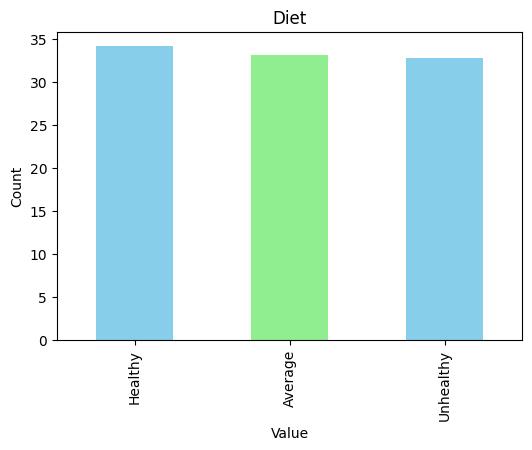

In [13]:
plt.figure(figsize=(6, 4))
data3.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Diet')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

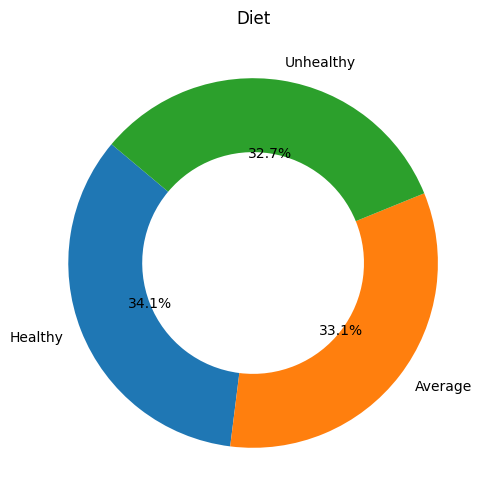

In [14]:
plt.figure(figsize=(6, 6))
plt.pie(data3, labels=data3.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Diet')
plt.show()

In [15]:
data4=df['Heart Attack Risk'].value_counts(normalize=True)*100
print(data4)

Heart Attack Risk
0    64.291073
1    35.708927
Name: proportion, dtype: float64


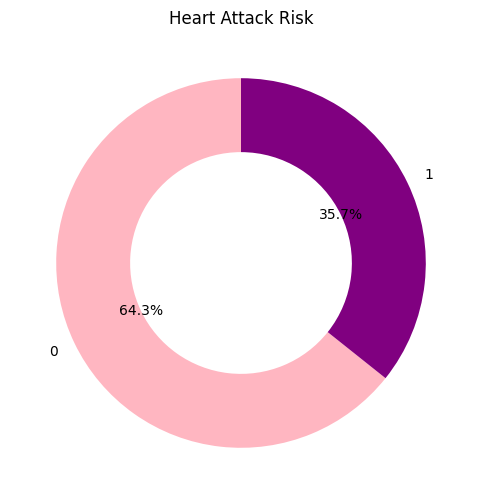

In [16]:
plt.figure(figsize=(6, 6))
plt.pie(data4, labels=['0', '1'], autopct='%1.1f%%', startangle=90, colors=['#FFB6C1', '#800080'], wedgeprops=dict(width=0.4))
plt.title('Heart Attack Risk')
plt.show()

In [17]:
data5 = df ['Sex'].value_counts(normalize=True)
print(data5)

Sex
Male      0.696924
Female    0.303076
Name: proportion, dtype: float64


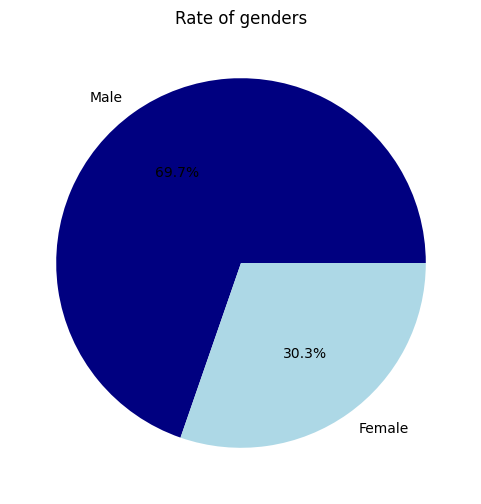

In [18]:
name = df['Sex'].value_counts().index.tolist()
value = df['Sex'].value_counts().tolist()
fig = plt.figure(figsize=(6,6))
plt.pie(value, labels=name,autopct='%1.1f%%',colors=['#000080','#ADD8E6'])
plt.title('Rate of genders')
plt.show()

In [19]:
data6 = df ['Heart Rate'].value_counts(normalize=True)
print(data6)

Heart Rate
72     0.018755
81     0.018505
57     0.017754
94     0.017754
97     0.017004
         ...   
80     0.011753
106    0.011253
103    0.011253
73     0.010503
96     0.010253
Name: proportion, Length: 71, dtype: float64


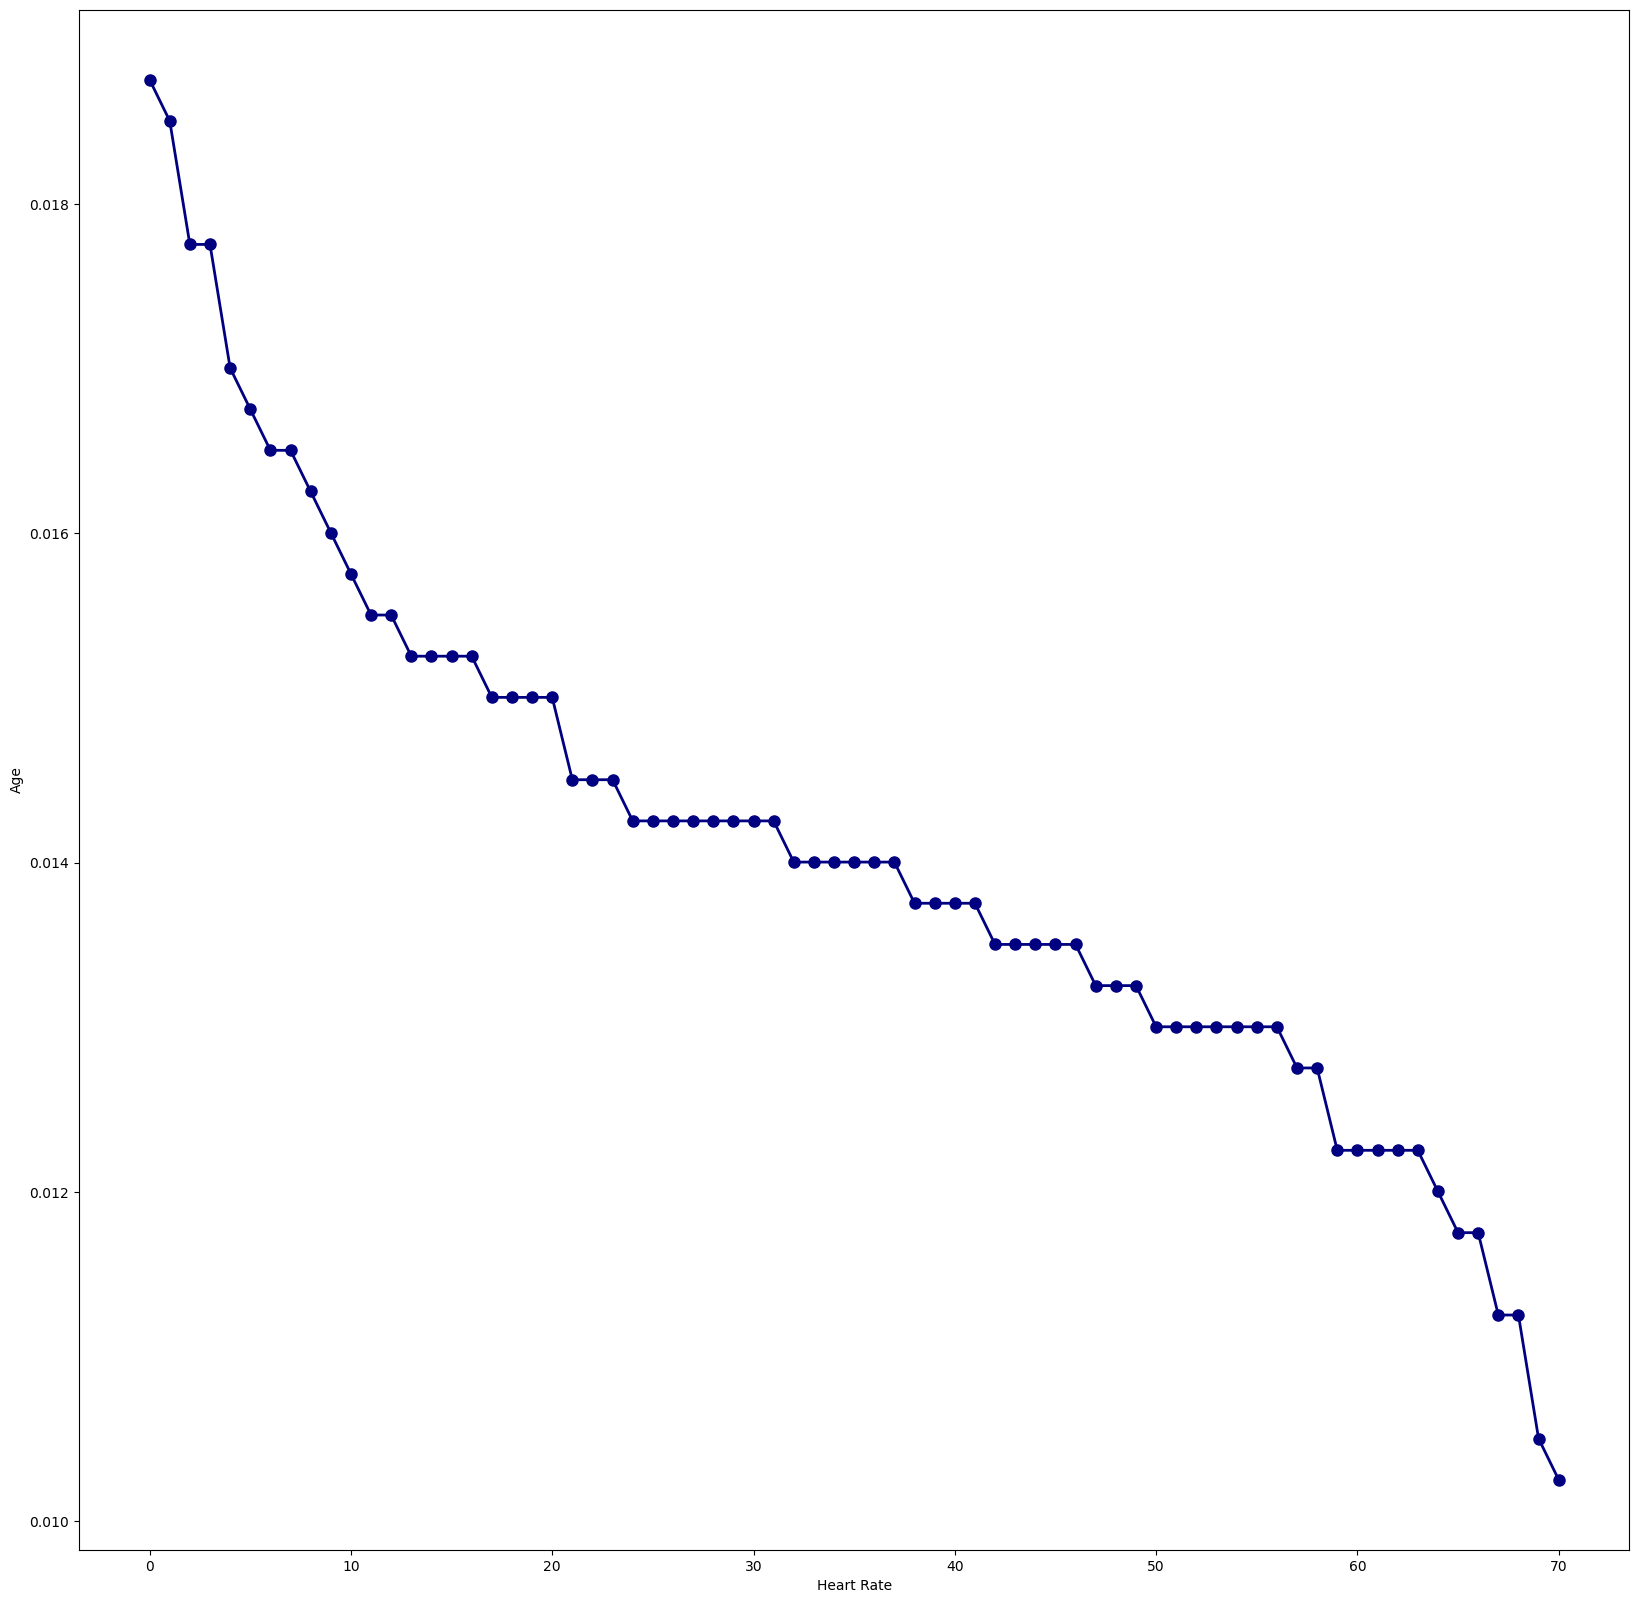

In [20]:
x = range(len(data6))
y= data6.values
plt.figure(figsize=(20,20))
plt.plot(x,y, color='#000080', marker='o', linestyle='-', linewidth=2, markersize=8, label='Pink Line')
plt.xlabel('Heart Rate')
plt.ylabel('Age')
plt.show()

In [21]:
# تقسيمهم لاثنين كانتجر
# 2 columns : systolic , diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

In [22]:
# تقسيم ل3 حالات
def categorize_bp(value):
    if value < 90:
        return 'Low'
    elif 90 <= value <= 120:
        return 'Medium'
    else:
        return 'High'

In [23]:
#  نسوي  كولوم جديد ونخزن فيه معلومات من الداتا فريم ونطبق عليه الشروط الي فوق
df['Systolic Category'] = df['Systolic'].apply(categorize_bp)
df['Diastolic Category'] = df['Diastolic'].apply(categorize_bp)

#نحسب  الكاونت 
systolic_counts = df['Systolic Category'].value_counts(normalize=True) * 100
diastolic_counts = df['Diastolic Category'].value_counts(normalize=True) * 100


# نجمعهم كداتا فريم وحده
combined_counts = systolic_counts.add(diastolic_counts, fill_value=0)

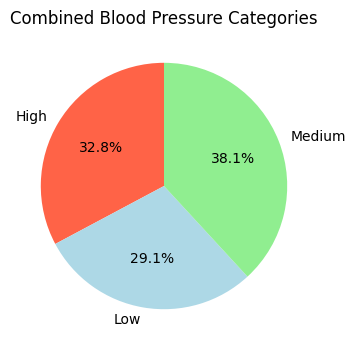

In [24]:
# رسم
plt.figure(figsize=(6, 4))
plt.pie(combined_counts, labels=combined_counts.index, autopct='%1.1f%%', startangle=90, colors=['tomato', 'lightblue', 'lightgreen'])
plt.title('Combined Blood Pressure Categories')
plt.show()

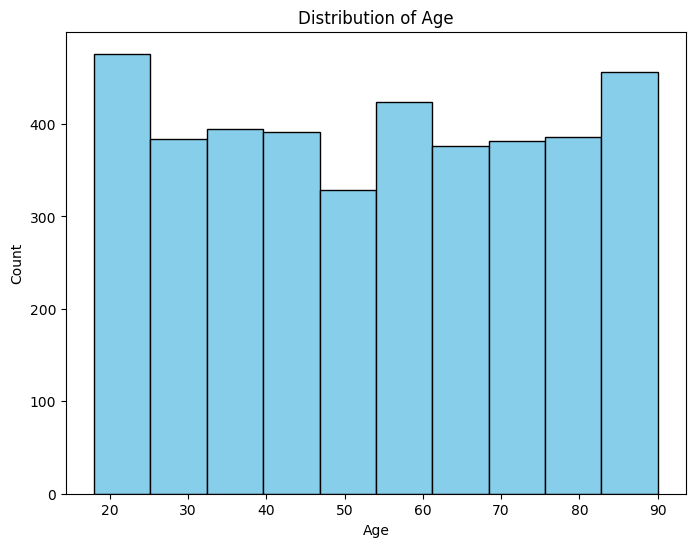

In [25]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

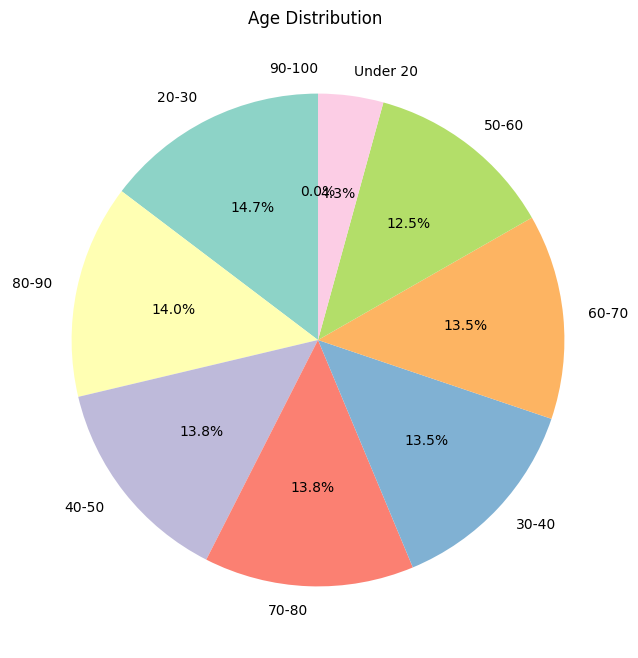

In [26]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100,]  # Age Ranges
labels = ['Under 20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']


df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)


age_counts = df['Age Category'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('Set3').colors)
plt.title('Age Distribution ')
plt.show()

<ipython-input-27-eb830e083aa8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk_mean = df.groupby('Age Category')['Heart Attack Risk'].mean()


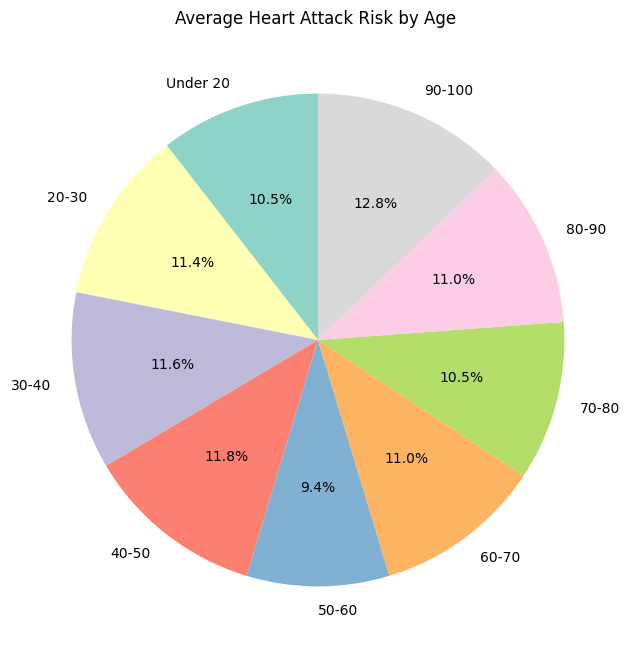

In [27]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Age ranges
labels = ['Under 20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate average 
age_risk_mean = df.groupby('Age Category')['Heart Attack Risk'].mean()


plt.figure(figsize=(10, 8))
plt.pie(age_risk_mean, labels=age_risk_mean.index, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('Set3').colors)
plt.title('Average Heart Attack Risk by Age ')
plt.show()

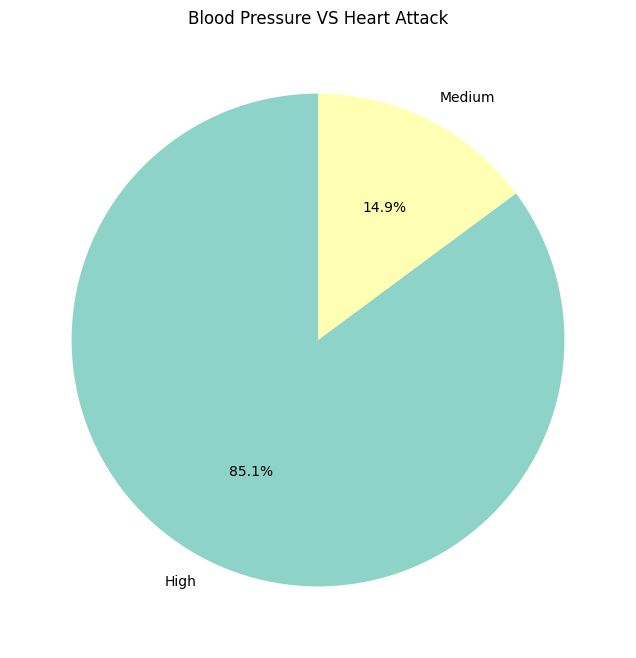

In [28]:
df['Systolic'] = df['Blood Pressure'].str.split('/').str[0].astype(int)
df['Diastolic'] = df['Blood Pressure'].str.split('/').str[1].astype(int)


def categorize_bp(systolic, diastolic):
    if systolic < 90 or diastolic < 60:
        return 'Low'
    elif 90 <= systolic <= 120 and 60 <= diastolic <= 80:
        return 'Medium'
    else:
        return 'High'


df['BP Category'] = df.apply(lambda row: categorize_bp(row['Systolic'], row['Diastolic']), axis=1)

# Count 
bp_counts = df['BP Category'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(bp_counts, labels=bp_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('Set3').colors)
plt.title('Blood Pressure VS Heart Attack')
plt.show()